Columns in the dataset: Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  201

C:\Users\AKSHAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AKSHAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AKSHAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

Accuracy: 0.8940677966101694
Precision: 0.9338225302350863
Recall: 0.5348412698412698
Confusion Matrix:
 [[  2   0  13]
 [  0  10  11]
 [  0   1 199]]
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.13      0.24        15
         0.0       0.91      0.48      0.62        21
         1.0       0.89      0.99      0.94       200

    accuracy                           0.89       236
   macro avg       0.93      0.53      0.60       236
weighted avg       0.90      0.89      0.87       236


K-Means Clustering:
K-Means Silhouette Score: 0.03015411479033131


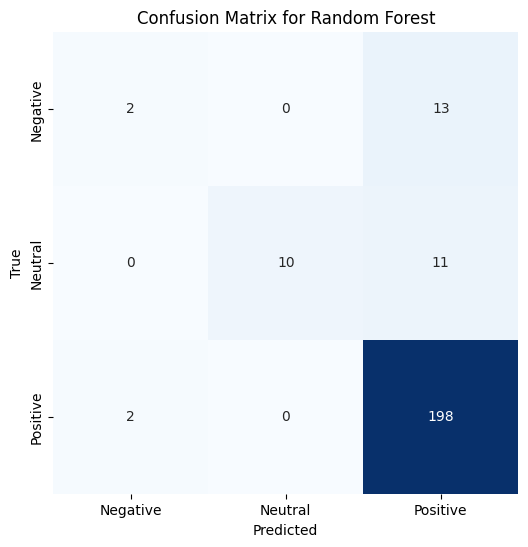

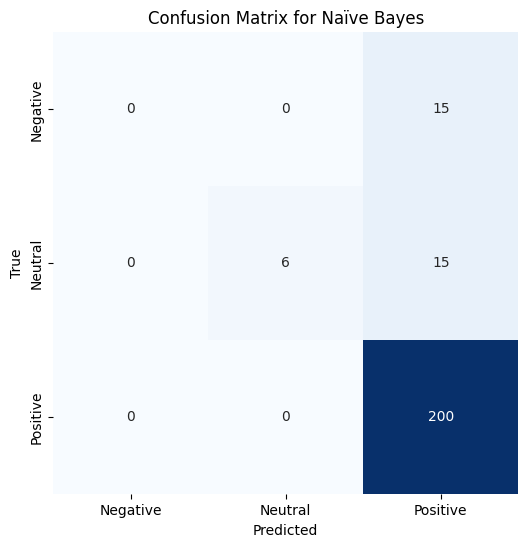

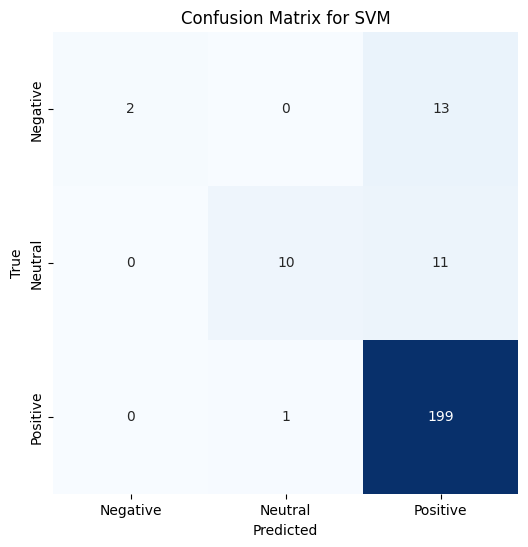

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Load the dataset from the Kaggle dataset
data = pd.read_csv(r"C:\Users\AKSHAY\Downloads\archive\7817_1.csv")

# Check the column names in the dataset
print("Columns in the dataset:", data.columns)

# Inspect the first few rows to see how the text data is labeled
print(data.head())

# Strip extra spaces from the column names if necessary
data.columns = data.columns.str.strip()

# Check for missing values in the dataset
print("Missing values in dataset:\n", data.isnull().sum())

# Ensure correct columns are being used
# Print column names and inspect them
print("Columns in the dataset:", data.columns)

# Update these variable names based on the actual column names
text_column = 'reviews.text'  # This is where the review text is
sentiment_column = 'reviews.rating'  # This is the column with ratings

# Map the ratings to sentiment: 1,2 -> negative, 3 -> neutral, 4,5 -> positive
sentiment_map = {1: -1, 2: -1, 3: 0, 4: 1, 5: 1}
data['sentiment'] = data[sentiment_column].map(sentiment_map)

# Drop rows where review text or sentiment is missing
data = data.dropna(subset=[text_column, 'sentiment'])

# Preprocess text and labels
X = data[text_column]  # The review text
y = data['sentiment']  # The sentiment label (positive, neutral, negative)

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
print("\nRandom Forest Classifier:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Naïve Bayes
print("\nNaïve Bayes Classifier:")
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# SVM
print("\nSupport Vector Machine (SVM):")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# K-Means Clustering
print("\nK-Means Clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
sil_score = silhouette_score(X_test, y_pred_kmeans)
print(f"K-Means Silhouette Score: {sil_score}")

# Confusion Matrix Plot Function
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Plot for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, "Naïve Bayes")

# Plot for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM")
